In [1]:
import json
import os
from google.colab import drive

drive.mount('/content/drive')
# json_dir = '/content/drive/MyDrive/json_files_2/'
# json_dir = '/content/drive/MyDrive/Throughput_May_Rokin/'
json_dir = '/content/drive/MyDrive/mq_benchamrk_result/LATENCYANDTRHOUGHPUT/'

throughput_dict = {}

for subdir, dirs, files in os.walk(json_dir):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(subdir, file)
            with open(file_path) as f:
                data = json.load(f)
                new_data = {}
                messageSize = None
                driver = None
                for key, value in data.items():
                    if key == "messageSize":
                        messageSize = value
                        new_data[key] = value
                        if str(messageSize) not in throughput_dict:
                          throughput_dict[str(messageSize)] = []
                          continue
                    elif key == "driver":
                      if value == 'Kafka-exactly-once':
                        value = 'Kafka'
                      driver = value
                      continue
                    if isinstance(value, list):
                        new_data[key] = max(value)
                        if key == "publishRate":
                            # new_data[key] *= messageSize
                            # new_data[key] /= (1024 * 1024)
                            throughput_dict[str(messageSize)].append({driver: new_data[key]})
                    else:
                        new_data[key] = value
                # set the path to the new file with the same name as the original file
                # new_file_path = os.path.join(subdir, f'max_{file}')
                # with open(new_file_path, 'w') as new_f:
                #     json.dump(new_data, new_f)

print(throughput_dict)

Mounted at /content/drive
{'102400': [{'Artemis': 373.7700706254499}, {'Kafka': 407.32111789280805}, {'Pulsar': 587.5713567736547}], '10240': [{'Kafka': 4202.017474655}, {'Artemis': 5470.768600513769}, {'Pulsar': 5479.7677876026455}], '1024000': [{'Artemis': 25.066036074163797}, {'Kafka': 29.327372742981247}, {'Pulsar': 110.45187119697674}], '1024': [{'Artemis': 43534.98604616006}, {'Kafka': 38264.992175044}, {'Pulsar': 57361.261509226424}, {'RocketMQ': 50682.32835214342}]}


In [2]:
print(throughput_dict)

{'102400': [{'Artemis': 373.7700706254499}, {'Kafka': 407.32111789280805}, {'Pulsar': 587.5713567736547}], '10240': [{'Kafka': 4202.017474655}, {'Artemis': 5470.768600513769}, {'Pulsar': 5479.7677876026455}], '1024000': [{'Artemis': 25.066036074163797}, {'Kafka': 29.327372742981247}, {'Pulsar': 110.45187119697674}], '1024': [{'Artemis': 43534.98604616006}, {'Kafka': 38264.992175044}, {'Pulsar': 57361.261509226424}, {'RocketMQ': 50682.32835214342}]}


In [3]:
%cd /content/drive/MyDrive/
# !pwd
!mkdir jvm_based_throughput
%cd jvm_based_throughput
# !pwd

/content/drive/MyDrive
/content/drive/MyDrive/jvm_based_throughput


In [4]:
sorted_dict = dict(sorted(throughput_dict.items(), key=lambda x: int(x[0])))
for k, v in sorted_dict.items():
    sorted_dict[k] = sorted(v, key=lambda x: list(x.values())[0])

In [5]:
sorted_dict

{'1024': [{'Kafka': 38264.992175044},
  {'Artemis': 43534.98604616006},
  {'RocketMQ': 50682.32835214342},
  {'Pulsar': 57361.261509226424}],
 '10240': [{'Kafka': 4202.017474655},
  {'Artemis': 5470.768600513769},
  {'Pulsar': 5479.7677876026455}],
 '102400': [{'Artemis': 373.7700706254499},
  {'Kafka': 407.32111789280805},
  {'Pulsar': 587.5713567736547}],
 '1024000': [{'Artemis': 25.066036074163797},
  {'Kafka': 29.327372742981247},
  {'Pulsar': 110.45187119697674}]}

In [6]:
def pad_list(lst, desired_length):
    return lst + [0] * (desired_length - len(lst))


In [7]:
file_sizes = sorted_dict.keys()
print(file_sizes)
artemis = []
kafka = []
pulsar = []
rocket_mq = []
new_dict = {'Artemis': 0, 'Kafka': 1, 'Pulsar': 2, "RocketMQ": 3}
file_sizes = list(file_sizes)

for size in file_sizes:
    key = size
    values = sorted_dict[str(key)]
    print(values)
    for litem in values:
      for nkey, val in litem.items():
        idx = new_dict[nkey]
        if idx == 0:
          artemis.append(round(val, 2))
        elif idx == 1:
          kafka.append(round(val, 2))
        elif idx == 2:
          pulsar.append(round(val, 2))
        elif idx == 3:
          rocket_mq.append(round(val, 2))


rocket_mq = pad_list(rocket_mq, len(pulsar))

dict_keys(['1024', '10240', '102400', '1024000'])
[{'Kafka': 38264.992175044}, {'Artemis': 43534.98604616006}, {'RocketMQ': 50682.32835214342}, {'Pulsar': 57361.261509226424}]
[{'Kafka': 4202.017474655}, {'Artemis': 5470.768600513769}, {'Pulsar': 5479.7677876026455}]
[{'Artemis': 373.7700706254499}, {'Kafka': 407.32111789280805}, {'Pulsar': 587.5713567736547}]
[{'Artemis': 25.066036074163797}, {'Kafka': 29.327372742981247}, {'Pulsar': 110.45187119697674}]


In [8]:
kafka

[38264.99, 4202.02, 407.32, 29.33]

In [9]:
artemis

[43534.99, 5470.77, 373.77, 25.07]

In [10]:
pulsar

[57361.26, 5479.77, 587.57, 110.45]

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.ticker as ticker

In [12]:
file_sizes

['1024', '10240', '102400', '1024000']

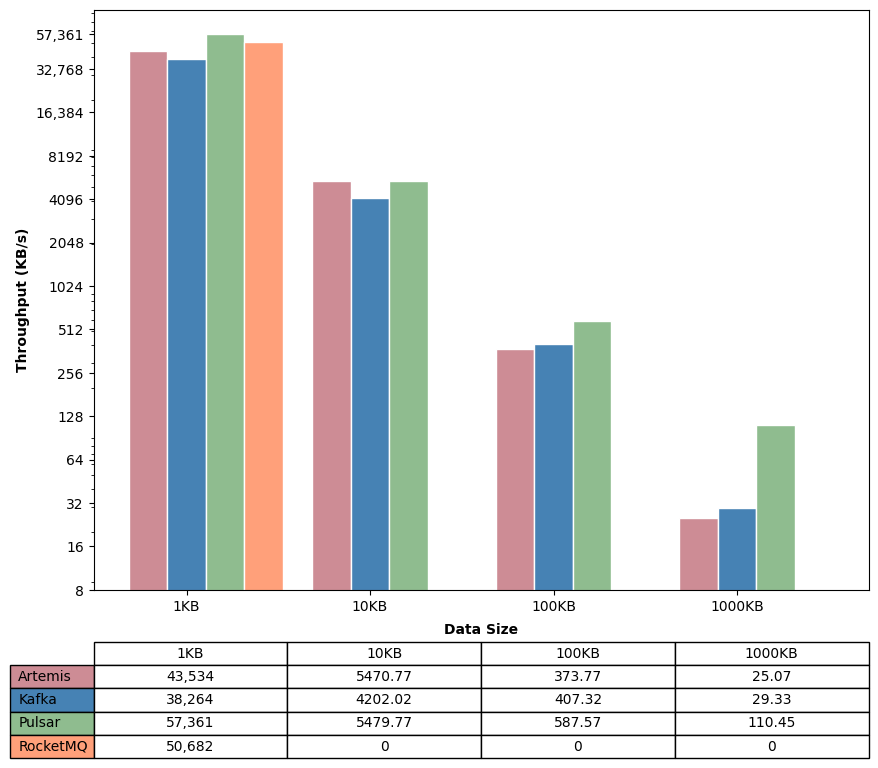

In [13]:
bar_width = 0.21
r1 = np.arange(len(file_sizes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# file_sizes = ['100B', '200B', '400B', '1KB', '2KB', '4KB']
file_sizes = ['1KB', '10KB', '100KB', '1000KB']

fig, ax = plt.subplots(figsize=(10, 10))

# Make the plot
artemis_bars = ax.bar(r1, artemis, color='#CD8C95', width=bar_width, edgecolor='white', label='Artemis')
kafka_bars = ax.bar(r2, kafka, color='#4682B4', width=bar_width, edgecolor='white', label='Kafka')
pulsar_bars = ax.bar(r3, pulsar, color='darkseagreen', width=bar_width, edgecolor='white', label='Pulsar')
rocket_mq_bars = ax.bar(r4, rocket_mq, color='#FFA07A', width=bar_width, edgecolor='white', label='RocketMQ')

ax.set_xlabel('Data Size', fontweight='bold')
ax.set_ylabel('Throughput (KB/s)', fontweight='bold')

ax.set_xticks([r + bar_width for r in range(len(file_sizes))])
ax.set_xticklabels(file_sizes)
ax.xaxis.labelpad = 7
# ax.legend(loc='upper left')

# y_values = [artemis, rabbitmq, redis, kafka]

import locale
locale.setlocale(locale.LC_ALL, '')  # Set the locale to use comma as the thousands separator

y_values = [
    [locale.format_string("%d", val, grouping=True) if val >= 10000 else str(val) for val in artemis],
    [locale.format_string("%d", val, grouping=True) if val >= 10000 else str(val) for val in kafka],
    [locale.format_string("%d", val, grouping=True) if val >= 10000 else str(val) for val in pulsar],
    [locale.format_string("%d", val, grouping=True) if val >= 10000 else str(val) for val in rocket_mq]

]
legend_colors = ['#CD8C95', '#4682B4', 'darkseagreen', '#FFA07A']

# '#AADAFF',

legend_rows = [Line2D([0], [0], color=color, linewidth=4, linestyle='-') for color in legend_colors]
ax.table(cellText=y_values,
         rowLabels=['Artemis', 'Kafka', 'Pulsar', 'RocketMQ'],
         rowColours=legend_colors,
         cellLoc='center',
         rowLoc='left',
         loc='bottom',
         bbox=[0, -0.29, 1, 0.2],
         colWidths=[0.1] * len(file_sizes),
         colLabels=file_sizes)

y_min = min([min(lst) for lst in [artemis, kafka, pulsar, rocket_mq]])
y_max = max([max(lst) for lst in [artemis, kafka, pulsar, rocket_mq]])

if y_min == 0:
  y_min = 10


ax.set_yscale('log')

y_ticks = [2**i for i in range(int(np.floor(np.log2(y_min))), int(np.ceil(np.log2(y_max))))] + [y_max]
# y_tick_labels = [f"{y:.2f}" for y in y_ticks]

y_tick_labels = [locale.format_string("%d", tick, grouping=True) if tick >= 10000 else '{:.0f}'.format(tick) for tick in y_ticks]

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

plt.subplots_adjust(bottom=0.3)

plt.savefig('new_max_throughput.pdf', dpi=300, bbox_inches='tight', facecolor='white')